In [1]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt #used to generate the legends
from typing import List

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension:  prova3ranks


Current folders are:
prova3ranks.0
prova3ranks.1
prova3ranks.2


### uncomment to show all the rows in tables

In [2]:
#display all the rows of the dataframe  
#pd.set_option('display.max_rows', None)

# creation of firm dataframes

In [3]:
#each firm will have its dataframe
#containing the values of the names of the columns for all the time units (rows)
colNames=["firm class type", "initial inventories","total costs", "final inventories","profits", "added value",\
          "total production", "cost of production", "cost of unused factors","total lost production", \
          "total cost of lost production", "cost of labor", "cost of capital", "cost of substitution"]

#fileNameArray is the array that will contain the names of the file of the balance sheets (one file for each firm), 
#subdivided by ranks in the columns of the array; 'itemsize=len(fileNameRoot)+30' is supposed to be sufficient to 
#report the names of the file;
fileNameArray=np.chararray((ag0num, rankNum), itemsize=len(fileNameRoot)+30, unicode=True)

In [4]:
#operating by folders to load the names of the files reported in the balancesheetList files
for k in range(rankNum):
    #which folder
    os.chdir("../"+folder+"."+str(k))
    with open(fileNameRoot+"_balancesheetList_"+str(k)+".csv","r") as fileList:
        reader = csv.reader(fileList, delimiter = ',')
        #read the name of the files, containing _balancesheetList_, present in the current set of folders
        for row in reader:
            for i in range(len(row)):
                fileNameArray[i,k]=row[i]

In [5]:
#creating a dictionary of firm dataframes
firmData={}
for k in range(rankNum):
    #in the folder with name extension == k
    os.chdir("../"+folder+"."+str(k))
    #repeating for the number of agent type 0 in each folder
    for i in range(ag0num):
        #extracting the agent uid from the name of the file
        p1=fileNameArray[i,k].find('(')
        p2=fileNameArray[i,k].find(')')+1
        uid=fileNameArray[i,k][p1:p2]
        #filling the dictionary with uids as keys and the balancesheetLists of the related firm as values
        firmData[uid]=pd.read_csv(fileNameArray[i,k], header=None)

#naming the firm dataframe columns, firm by firm, by scrolling the keys of the dictionary
for aFirm in firmData.keys():
    firmData[aFirm].columns=colNames

# Retrieve a firm

In [6]:
#retrieve a firm with id and rank
def retrieveFirmBalancesheet(id,r):
    return firmData['('+str(id)+', 0, '+str(r)+')']

In [7]:
#example
#retrieveFirmBalancesheet(29,2)

# The allFirmData dataframe

In [8]:
#create a dataframe summing up all the firm dataframes
allFirmData=firmData[list(firmData.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                      #independent copy with a new name

for aFirmUid in list(firmData.keys())[1:]: #from the second to the last
    allFirmData=allFirmData.add(firmData[aFirmUid])

allFirmData.__description__="all firms"

In [9]:
allFirmData

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,cost of substitution
0,645.0,0.000000e+00,10882.882801,2.487367e+03,-8395.516135,2487.366667,781.642858,2097.083333,8785.799468,45.295151,114.750000,6167.0,36446.897666,30076.428153
1,645.0,2.487367e+03,42613.897666,7.212708e+03,-37888.555999,4725.341667,1511.700425,4095.000000,38518.897666,137.464902,340.416667,6167.0,42474.255825,25734.964878
2,645.0,7.212708e+03,48641.255825,1.367671e+04,-42177.255825,6464.000000,2132.520455,5559.333333,43081.922491,175.173141,441.000000,6167.0,44928.711107,23136.802139
3,645.0,1.367671e+04,51095.711107,2.109715e+04,-43675.269441,7420.441667,2476.335324,6503.666667,44592.044441,256.467011,644.083333,6167.0,45671.491244,18032.445608
4,645.0,2.109715e+04,51838.491244,2.935926e+04,-43576.382910,8262.108333,2824.528900,7415.000000,44423.491244,356.179826,890.083333,6167.0,46088.868694,17143.413154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,645.0,1.264906e+06,84339.666703,1.278321e+06,-70924.658370,13415.008333,4816.828198,12828.666667,71511.000037,838.106908,2124.416667,44073.0,40411.056545,22317.177600
96,645.0,1.278321e+06,84484.056545,1.291707e+06,-71098.098212,13385.958333,4848.543402,12876.500000,71607.556545,868.755355,2181.416667,44179.0,40453.081912,21932.760914
97,645.0,1.291707e+06,84632.081912,1.305028e+06,-71310.523579,13321.558333,4737.124583,12645.416667,71986.665245,811.634997,2022.666667,44179.0,40449.705568,23192.506612
98,645.0,1.305028e+06,84628.705568,1.319104e+06,-70553.205568,14075.500000,5105.677585,13377.000000,71251.705568,833.663509,2114.666667,44182.0,40490.881358,22196.965591


In [10]:
allFirmData.__description__

'all firms'

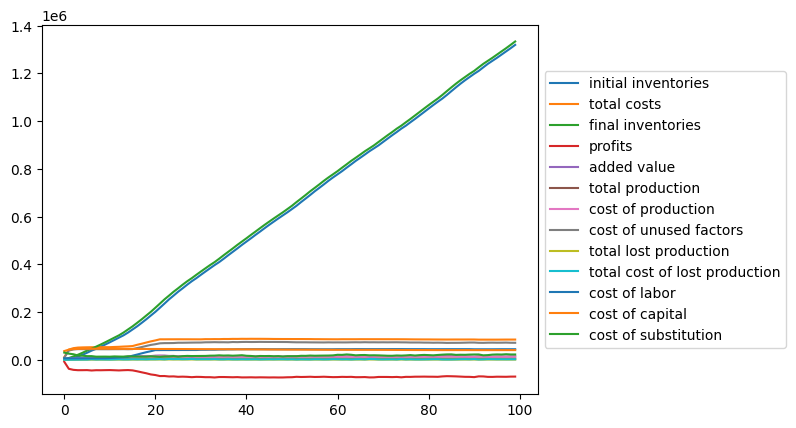

In [11]:
allFirmData.drop(['firm class type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<Axes: >

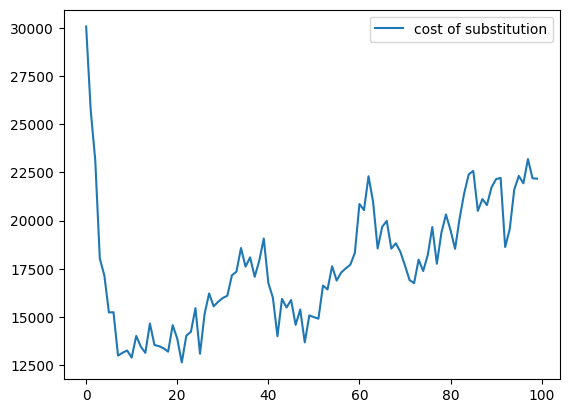

In [12]:
allFirmData[['cost of substitution']].plot()

<Axes: >

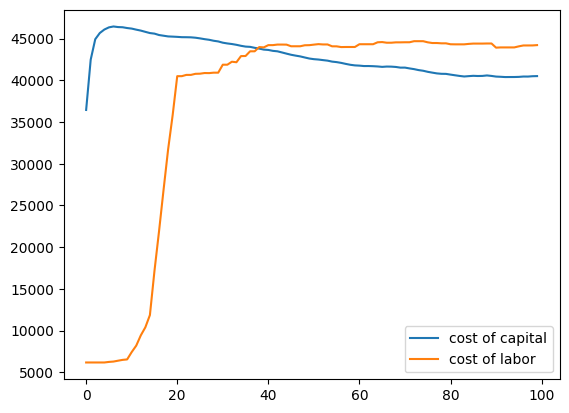

In [13]:
allFirmData[['cost of capital','cost of labor']].plot()

# Considering groups of firms

In [14]:
#summarize a subset of balancesheets of firm with 'dimensional class' in a given list
def sumBalancesheetsWithAGivenDimensionalClass(dimClassList: List):
    tmpDict={}
    for aFirmUid in list(firmData.keys())[:]:
        if firmData[aFirmUid]['firm class type'].loc[0] in dimClassList:
            tmpDict[aFirmUid]=firmData[aFirmUid]
    print("found",len(tmpDict), "firms")
    
    if tmpDict=={}: return 0 #firms with the required dimensional class: not found
        
    allLocalFirmData=tmpDict[list(tmpDict.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                              #independent copy with a new name

    for aFirmUid in list(tmpDict.keys())[1:]: #from the second to the last
        allLocalFirmData=allLocalFirmData.add(tmpDict[aFirmUid])

    memo="firms of groups"
    for g in dimClassList: memo = memo +" "+str(g)
    allLocalFirmData.__description__= memo
    
    return allLocalFirmData


In [15]:
#example with dimensional class 0
sumOfBalanceSheetSubset = sumBalancesheetsWithAGivenDimensionalClass([0])

found 30 firms


In [16]:
sumOfBalanceSheetSubset.__description__

'firms of groups 0'

In [17]:
sumOfBalanceSheetSubset

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,cost of substitution
0,0.0,0.0,3886.006020,699.4,-3186.606020,699.4,206.132391,560.0,3326.006020,8.007402,22.0,2021.0,14097.259997,11640.812500
1,0.0,699.4,16118.259997,2054.0,-14763.659997,1354.6,409.225212,1112.0,15006.259997,26.312083,70.0,2021.0,16506.314815,9212.805556
2,0.0,2054.0,18527.314815,4128.8,-16452.514815,2074.8,615.889841,1636.0,16891.314815,14.863269,40.0,2021.0,17516.100979,8659.009066
3,0.0,4128.8,19537.100979,6749.6,-16916.300979,2620.8,793.825199,2140.0,17397.100979,46.716200,124.0,2021.0,17703.787549,6244.048852
4,0.0,6749.6,19724.787549,9934.6,-16539.787549,3185.0,1001.105313,2696.0,17028.787549,91.900150,246.0,2021.0,17923.668956,6944.307677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,334893.0,29249.564571,338026.0,-26116.564571,3133.0,1197.447894,3444.0,25805.564571,392.742063,1034.0,14039.0,15203.867766,8838.069184
96,0.0,338026.0,29242.867766,341689.4,-25579.467766,3663.4,1248.858942,3470.0,25772.867766,244.251611,652.0,14020.0,15204.664614,7992.622099
97,0.0,341689.4,29224.664614,345490.6,-25423.464614,3801.2,1209.169772,3296.0,25928.664614,136.876711,372.0,14020.0,15176.291307,9265.757119
98,0.0,345490.6,29196.291307,348899.2,-25787.691307,3408.6,1245.746643,3494.0,25702.291307,331.453104,872.0,14020.0,15170.065732,8022.203205


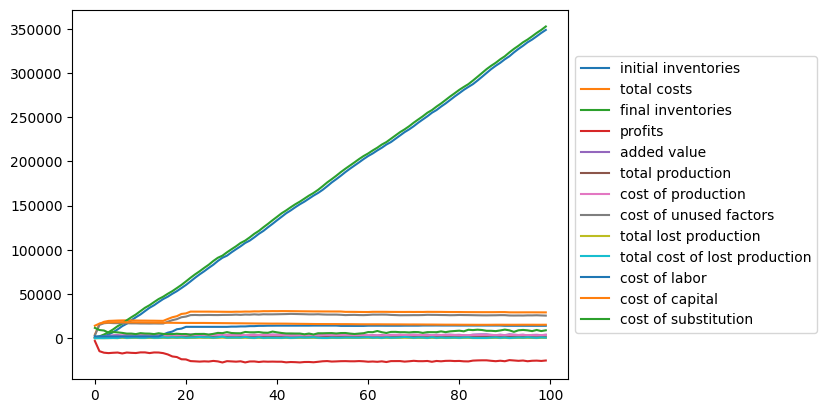

In [18]:
sumOfBalanceSheetSubset.drop(['firm class type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<Axes: >

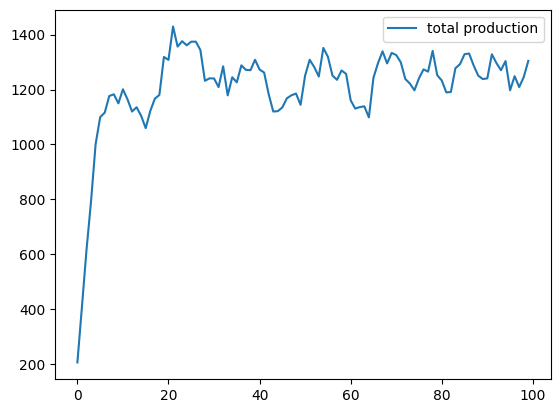

In [19]:
sumOfBalanceSheetSubset[['total production']].plot()

<Axes: >

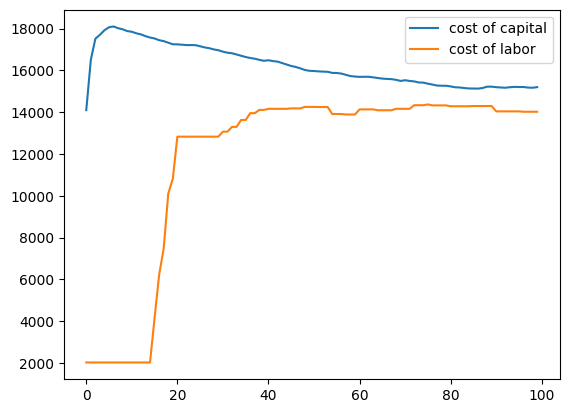

In [20]:
sumOfBalanceSheetSubset[['cost of capital', 'cost of labor']].plot()

# The National Economic Balance Table

In [21]:
allFirmData[['initial inventories', 'added value', 'final inventories']]

,initial inventories,added value,final inventories
0,0.000000e+00,2487.366667,2.487367e+03
1,2.487367e+03,4725.341667,7.212708e+03
2,7.212708e+03,6464.000000,1.367671e+04
3,1.367671e+04,7420.441667,2.109715e+04
4,2.109715e+04,8262.108333,2.935926e+04
...,...,...,...
95,1.264906e+06,13415.008333,1.278321e+06
96,1.278321e+06,13385.958333,1.291707e+06
97,1.291707e+06,13321.558333,1.305028e+06
98,1.305028e+06,14075.500000,1.319104e+06
